In [2]:
#Import dependencies and setup data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import requests
import time
import seaborn as sns
from scipy.stats import sem
from scipy import stats
import gmaps

In [3]:
#Files to Load
#temp_data_to_load = ".../_data.csv"

heart_data_to_load = "resources/Heart_Disease_Mortality_Data.csv"
heart_data_pd = pd.read_csv(heart_data_to_load)

heart_data_pd.head()

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Location 1
0,2014,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,105.3,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2013,"(55.440626, -161.962562)"
1,2014,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,211.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2016,"(52.995403, -170.251538)"
2,2014,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,257.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2020,"(61.159049, -149.103905)"
3,2014,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,351.6,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2050,"(60.924483, -159.749655)"
4,2014,AK,Bristol Bay,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Overall,Race/Ethnicity,Overall,T2,2060,"(58.754192, -156.694709)"


In [4]:
#Select columns for merge
#selected = ["", "", ""]
#selected_df = data_file_pd[selected]
#selected_df.head()
selected = ['LocationAbbr', 'Data_Value','Stratification1' ]
selected_df = heart_data_pd[selected]
selected_df.head()

,LocationAbbr,Data_Value,Stratification1
0,AK,105.3,Overall
1,AK,211.9,Overall
2,AK,257.9,Overall
3,AK,351.6,Overall
4,AK,NaN,Overall


In [5]:
#To use Loc to list headers: dataframe.columns
heart_data_pd.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'GeographicLevel', 'DataSource',
       'Class', 'Topic', 'Data_Value', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'TopicID', 'LocationID', 'Location 1'],
      dtype='object')

In [6]:
heartDiseaseDF = selected_df.rename(index=str, columns={"LocationAbbr":"State",
                                                       "Data_Value":"Mortality Count",
                                                        "Stratification1":"Gender"})
heartDiseaseDF.head()
#heartDiseaseDF.columns

,State,Mortality Count,Gender
0,AK,105.3,Overall
1,AK,211.9,Overall
2,AK,257.9,Overall
3,AK,351.6,Overall
4,AK,NaN,Overall


In [7]:
heartDiseaseDF = heartDiseaseDF.dropna()
heartDiseaseDF.count()

State              32149
Mortality Count    32149
Gender             32149
dtype: int64

In [8]:
gender = heartDiseaseDF.groupby(["State","Gender"])
gender

In [9]:
#gender.size().unstack()
#Pivot table for all states
print("Total heart disease 10^5 by state grouped by gender")
heartDiseaseDF.pivot_table(index='Gender', columns = 'State', values = 'Mortality Count', aggfunc = 'sum')

Total heart disease 10^5 by state grouped by gender


State,AK,AL,AR,AS,AZ,CA,CO,CT,DC,DE,...,TX,US,UT,VA,VI,VT,WA,WI,WV,WY
Gender,,,,,,,,,,,,,,,,,,,,,
Female,13428.4,80202.6,80573.6,563.6,17973.9,74522.5,42227.1,8931.6,2124.4,4241.5,...,270205.2,1408.7,21941.7,111639.2,64.3,7337.3,34925.7,46429.9,44008.1,13101.7
Male,28056.2,125456.1,128588.2,803.0,29690.4,124250.5,68598.8,14395.3,3553.7,6201.8,...,412804.0,2245.3,31584.8,175420.1,114.3,11924.9,61943.0,76909.3,66417.4,28170.3
Overall,22513.1,103700.0,108849.3,694.6,24124.8,101083.9,60649.9,11442.3,2894.9,5257.6,...,354848.1,1776.6,31105.6,147851.8,86.3,9730.7,52466.3,75082.6,57518.8,23693.4


In [10]:
#We want to find out the total of every gender per 1000,000 population suffered from HD.
#Perform a GROUP BY to group all the Genders.
genderDFGrouped = heartDiseaseDF.groupby(by='Gender')
totalHDByGenderType = genderDFGrouped['Mortality Count'].sum()
print(f"Total number of people per 10^5 population suffering from HD grouped by Gender: {totalHDByGenderType}")

Total number of people per 10^5 population suffering from HD grouped by Gender: Gender
Female     2809154.1
Male       4532552.0
Overall    3888157.4
Name: Mortality Count, dtype: float64


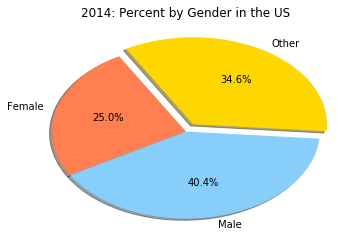

In [14]:
#Construct a Pie Chart to indicate the HD % suffered by every Gender 
colors = ['Coral', 'LightSkyBlue', 'Gold']
explodeTuple = [0,0,0.1]
labels=['Female', 'Male', 'Other']

#Build the Pie Chart
plt.pie(x=totalHDByGenderType, explode=explodeTuple, colors=colors, labels=labels, 
        shadow=True, autopct="%1.1f%%", startangle = 120)
plt.axes().set_aspect(0.65)
plt.title("2014: Percent by Gender in the US")
plt.savefig("Images/Percent_by_Gender_2014.png")
plt.show()

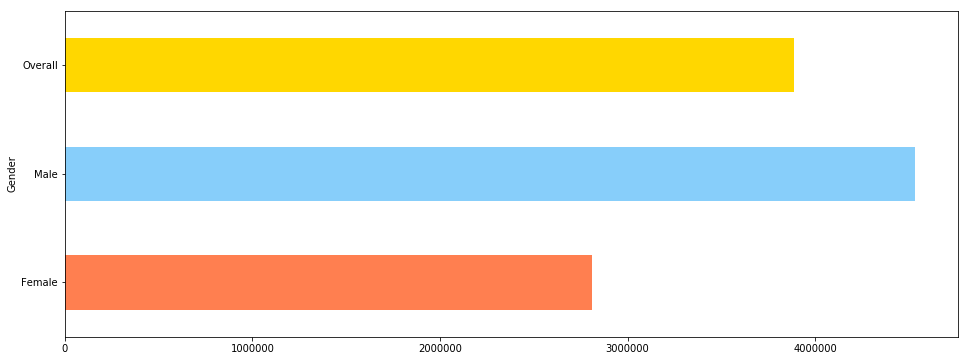

In [15]:
totalHDByGenderType.plot(kind='barh', stacked=True, figsize=[16,6], colors=colors)
plt.savefig("Images/Percent_by_Gender_bar_2014.png")
    

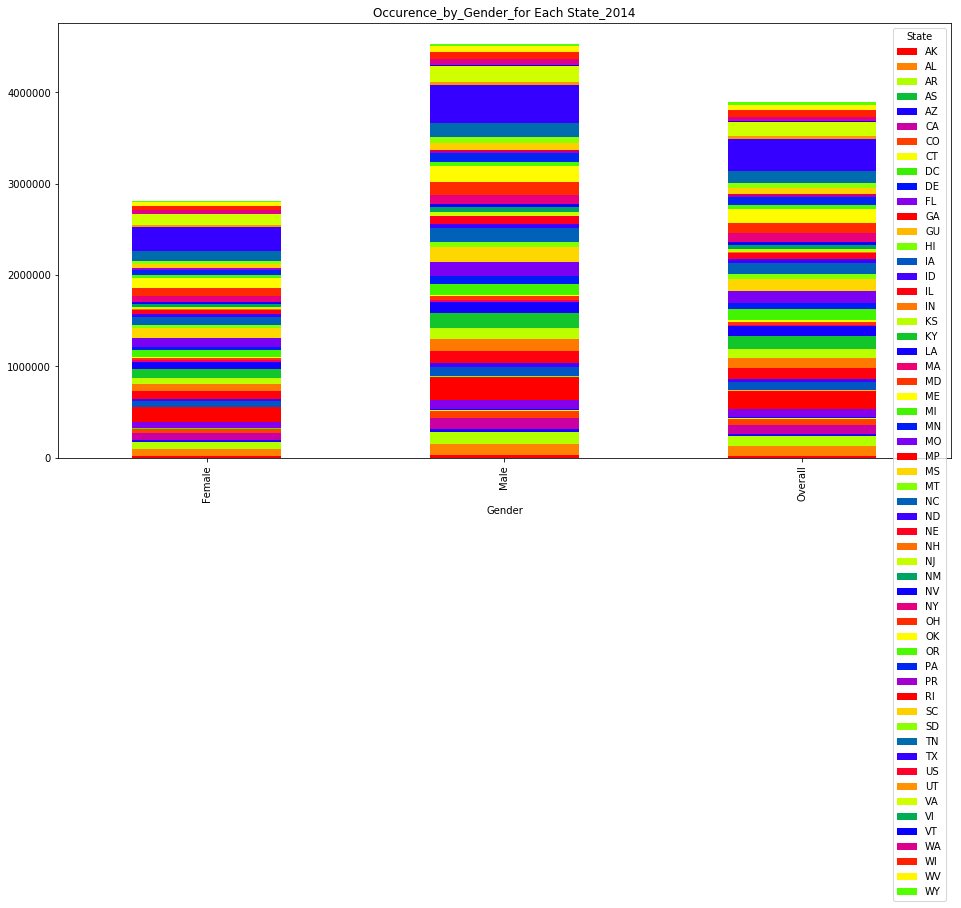

In [19]:
#Pivot table plot
hd_state_gender = heartDiseaseDF.pivot_table(index='Gender', columns = 'State', values = 'Mortality Count', aggfunc = 'sum')
hd_state_gender.plot(kind='bar', figsize=[16,8], stacked=True, colormap='prism',
                     title='Occurence_by_Gender_for Each State_2014')

plt.savefig("Images/Occurence_by_Gender_for Each State_2014.png")      

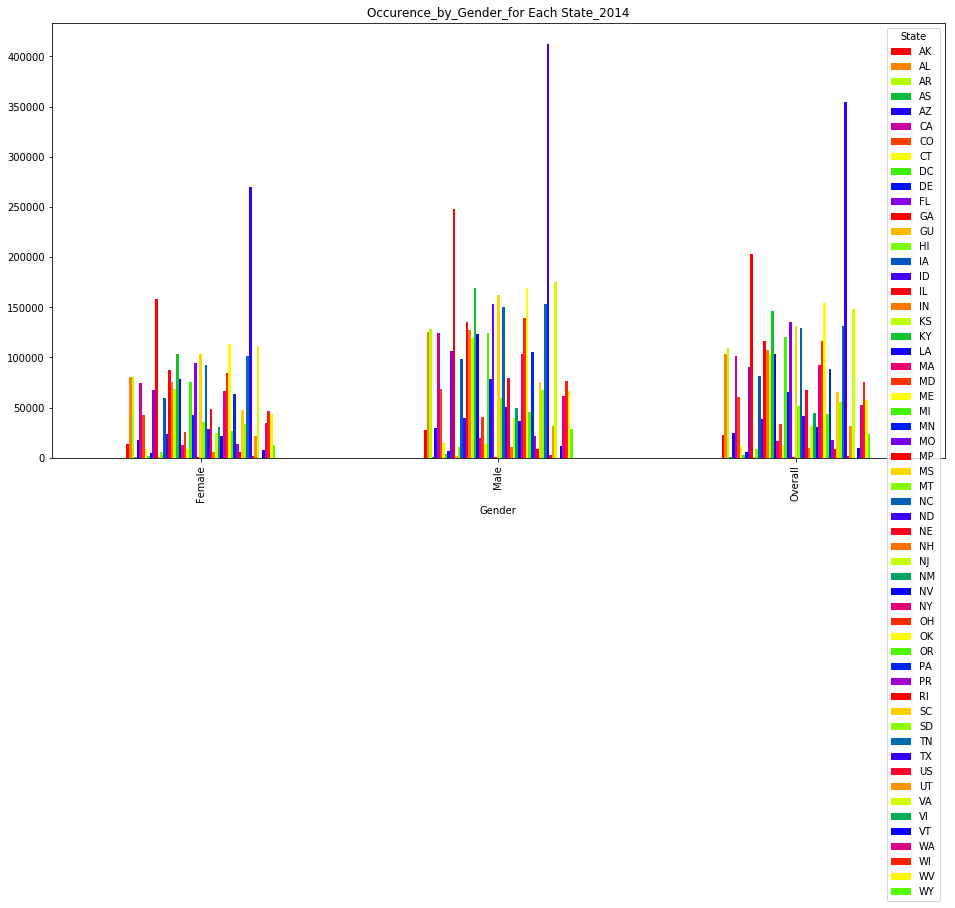

In [20]:
#Pivot table plot
hd_state_gender = heartDiseaseDF.pivot_table(index='Gender', columns = 'State', values = 'Mortality Count', aggfunc = 'sum')
hd_state_gender.plot(kind='bar', figsize=[16,8], stacked=False, colormap='prism',
                     title='Occurence_by_Gender_for Each State_2014')

plt.savefig("Images/Occurence_by_Gender_for Each State_2014_2.png")     

In [21]:
#Sort by highest risk group
#ranked_gender = gender.sort_values(["State"], ascending=False)
#ranked_gender = gender.reset_index(inplace=True)
#ranked_gender